# Foursquare Future Cities Dataset

In [1]:
%matplotlib inline

In [2]:
def import_data(filepath='foursquare/4sqForGoodDataset/', city='London'):
    from pandas import read_csv
    from os.path import join
    venues = read_csv(join(filepath, 'venues_v2', city+'_venue_info_v2.csv'), index_col=0)
    movemt = read_csv(join(filepath, 'movements_v2', city+'_movements_v2.csv'), names=['from', 'to', 'date', 'time', 'num'])
    return venues, movemt

In [3]:
def generate_params(df_v, df_m, by_time=False):
    import numpy as np
    pi = df_v['category'].value_counts()/df_v['category'].count()
    k = len(pi)
    cat_dict = dict(zip(pi.index, range(k)))
    if by_time:
        count = dict()
        for time, df in df_m.groupby('time'):
            count_t = np.zeros((k, k))
            for idx, row in df.iterrows():
                count_t[cat_dict[df_v['category'][row['from']]]][cat_dict[df_v['category'][row['to']]]] += row['num']
            count[time] = count_t            
    else:
        count = np.zeros((k, k))
        for idx, row in df_m.iterrows():
            count[cat_dict[df_v['category'][row['from']]]][cat_dict[df_v['category'][row['to']]]] += row['num']
    return count, pi

In [4]:
def import_all_data(cities=None):
    from numpy import save
    if cities is None: cities = ['Chicago', 'Istanbul', 'Jakarta', 'London', 'Los Angeles', 'New York', 'Paris', 'Seoul', 'Singapore', 'Tokyo']
    for city in cities:
        v, m = import_data(city=city)
        psi, pi = generate_params(v, m)
        save('4sq_'+city+'_psi', psi)
        pi.to_csv('4sq_'+city+'_pi.csv', header=True)

In [5]:
def generate_all_sbms(cities=None):
    from numpy import load
    from pandas import read_csv
    from egosbm import EgocentricSBM
    if cities is None: cities = ['Chicago', 'Istanbul', 'Jakarta', 'London', 'Los Angeles', 'New York', 'Paris', 'Seoul', 'Singapore', 'Tokyo']
    for city in cities:
        psi = load('4sq_'+city+'_psi.npy')
        pi = read_csv('4sq_'+city+'_pi.csv', index_col=0)
        sbm = EgocentricSBM.StochasticBlockModel(psi, pi=pi.values, name=('4sq_'+city+'_sbm', pi.index), counts=True)
        sbm.save()

In [6]:
def project_all_sbms(cities=None, plot=True):
    from egosbm import EgocentricSBM
    sbms = dict()
    proj = dict()
    if cities is None: cities = ['Chicago', 'Istanbul', 'Jakarta', 'London', 'Los Angeles', 'New York', 'Paris', 'Seoul', 'Singapore', 'Tokyo']
    for city in cities:
        print(city)
        sbms[city] = EgocentricSBM.StochasticBlockModel(filepath='4sq_'+city+'_sbm.npz')
        proj[city] = sbms[city].project(m=7, plot=plot)
    return sbms, proj

In [7]:
def generate_all_barcodes(cities=None):
    from egosbm import EgocentricSBM
    if cities is None: cities = ['Chicago', 'Istanbul', 'Jakarta', 'London', 'Los Angeles', 'New York', 'Paris', 'Seoul', 'Singapore', 'Tokyo']
    bars = dict()
    for city in cities:
        sbm = EgocentricSBM.StochasticBlockModel(filepath='4sq_'+city+'_sbm.npz')
        bar = sbm.generate_barcode()    
        bar.save()

In [8]:
def get_all_barcodes(cities=None, epsilon=False, plot=True):
    from egosbm import EgocentricSBM
    if cities is None: cities = ['Chicago', 'Istanbul', 'Jakarta', 'London', 'Los Angeles', 'New York', 'Paris', 'Seoul', 'Singapore', 'Tokyo']
    area = dict()
    for city in cities:
        bar = EgocentricSBM.StochasticBlockModel.Barcode(filepath='4sq_'+city+'_sbm.bar.npz')
        if plot:
            print(city)
            bar.plot(norm=True)
        area[city] = bar.area(epsilon)
    return area

In [9]:
def plot_scatter(xdata, ydata, zdata=None, z=0, phi=45, text=None, xlab='x', ylab='y', zlab='z'):
    import matplotlib.pyplot as plt
    from scipy.stats import spearmanr
    fig = plt.figure(dpi=180)
    if z and zdata is not None:
        from mpl_toolkits.mplot3d import Axes3D
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(xdata, ydata, zdata)
        cx = [ax.get_xlim3d()[0]]*len(xdata)
        cy = [ax.get_ylim3d()[0]]*len(ydata)
        cz = [ax.get_zlim3d()[0]]*len(zdata)
        ax.scatter(xdata, ydata, cz, c=zdata, alpha=0.2, lw=0)
        ax.scatter(cx, ydata, zdata, c=xdata, alpha=0.2, lw=0)
        ax.scatter(xdata, cy, zdata, c=ydata, alpha=0.2, lw=0)
        if text is not None: [ax.text(x, y, z, t) for (x,y,z,t) in zip(xdata, ydata, zdata, text)]
        ax.set_xlabel(xlab)
        ax.set_ylabel(ylab)
        ax.set_zlabel(zlab)
        ax.view_init(z, phi)
        plt.show()
    else:
        plt.scatter(xdata, ydata, c=zdata)
        if text is not None: [plt.text(x, y, t) for (x,y,t) in zip(xdata, ydata, text)]
        rho, pval = spearmanr(xdata, ydata)
        plt.title('rho: %.2f, pval: %.2f'%(round(rho,2), round(pval,2)))
        if zdata is not None:
            cbar = plt.colorbar()
            cbar.set_label(zlab)
        plt.xlabel(xlab)
        plt.ylabel(ylab)
        plt.show()

In [10]:
#import_all_data()
#generate_all_sbms()
#generate_all_barcodes()

C:\Users\sl2416\Documents\phd\dat\egosbm.py:1168: RuntimeWarning: symmetrising the stochastic block matrix
  if self.directed: warn('symmetrising the stochastic block matrix', RuntimeWarning)


KeyboardInterrupt: 

Chicago


C:\Users\sl2416\Documents\phd\dat\egosbm.py:1168: RuntimeWarning: symmetrising the stochastic block matrix
  if self.directed: warn('symmetrising the stochastic block matrix', RuntimeWarning)


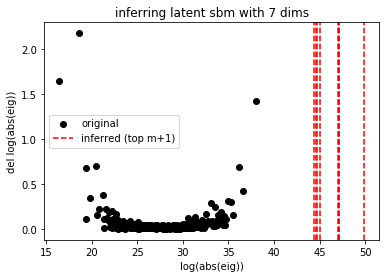

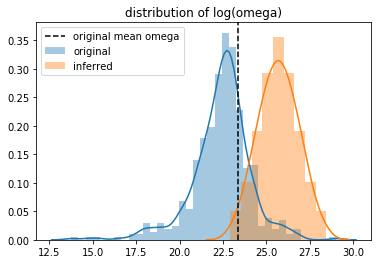

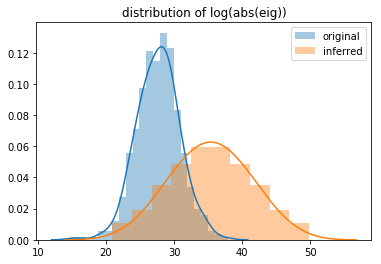

Istanbul


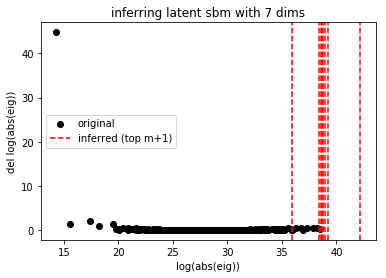

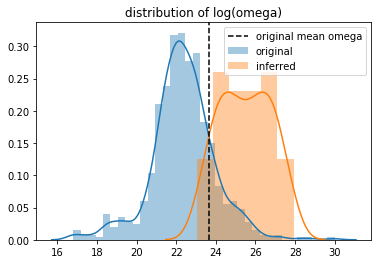

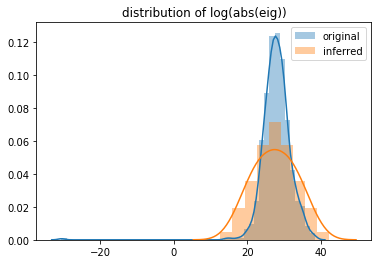

Jakarta


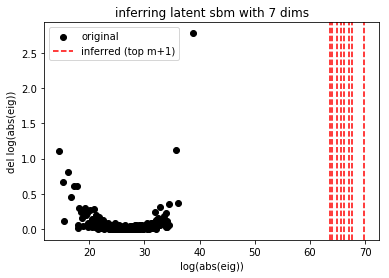

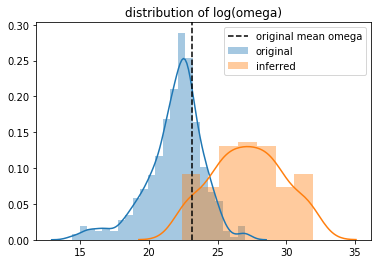

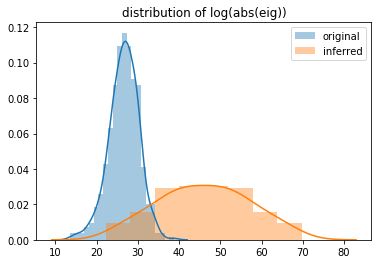

London


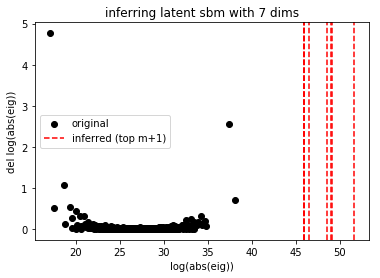

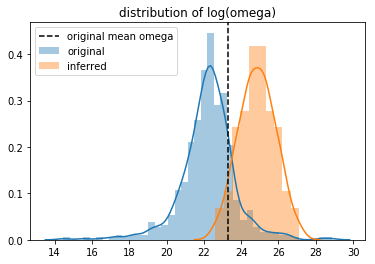

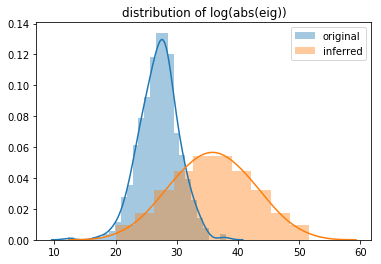

Los Angeles


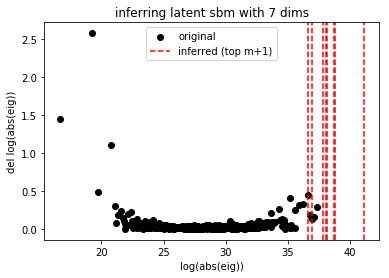

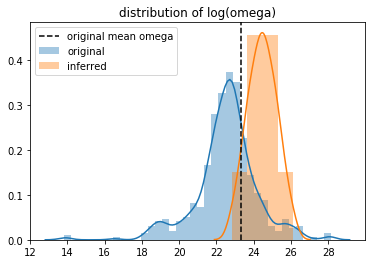

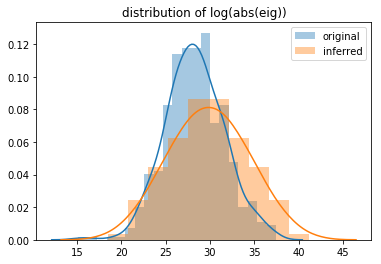

New York


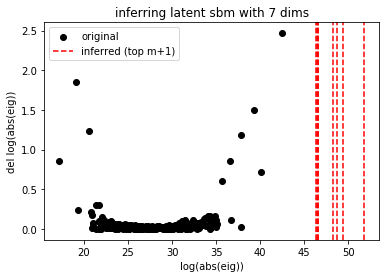

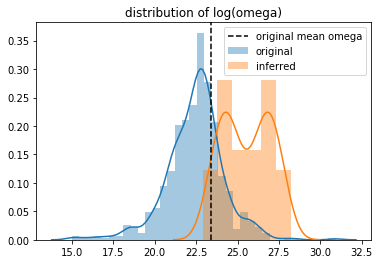

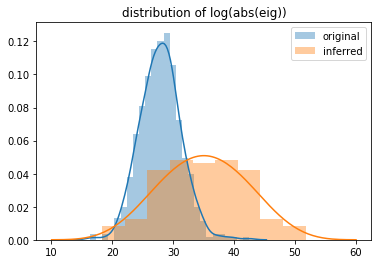

Paris


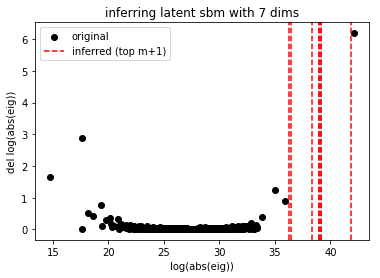

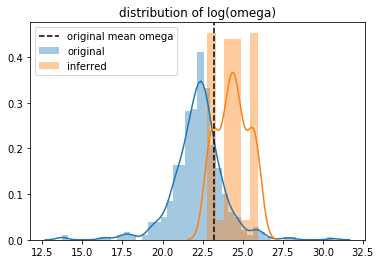

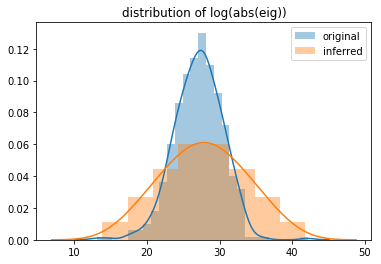

Seoul


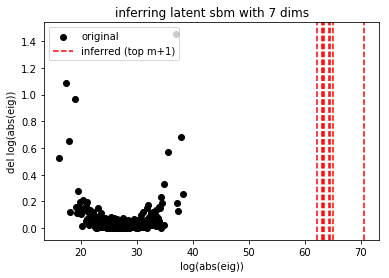

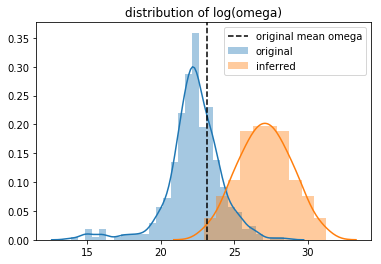

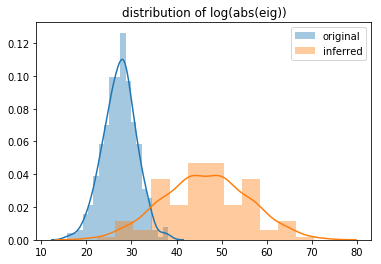

Singapore


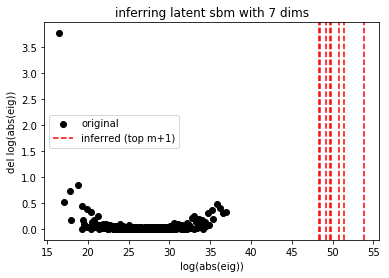

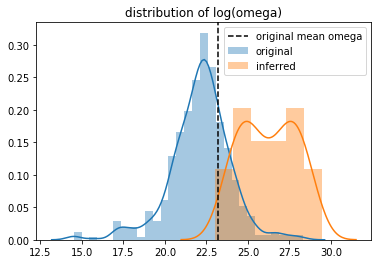

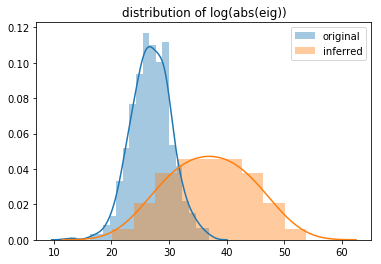

Tokyo


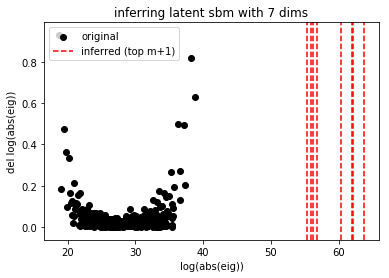

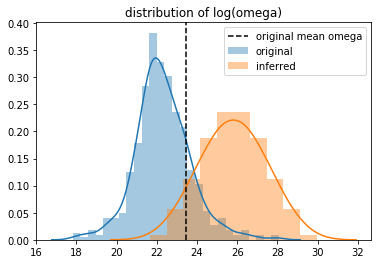

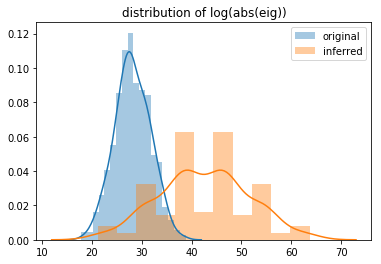

In [19]:
sbms, projs = project_all_sbms()

In [18]:
sas = dict()
for city in projs.keys():
    sas[city] = projs[city].sas_global()

In [19]:
print(sas)

{'Chicago': (1.2543891061173817, 3.7161939602346608), 'Istanbul': (0.7903287839027585, 0.932577077999362), 'Jakarta': (0.2143855131593524, 0.6271238392098857), 'London': (0.7199701446060143, 2.468204346530429), 'Los Angeles': (1.0466533383607877, 1.938497053596036), 'New York': (0.6020600780214044, 1.2923648354985806), 'Paris': (0.6013033488701017, 0.647097147398346), 'Seoul': (0.12601536452187287, 0.8807915758207279), 'Singapore': (0.6045268312785366, 1.8474066850608872), 'Tokyo': (0.5668398274141511, 1.2928790279161018)}


Chicago


C:\Users\sl2416\Documents\phd\dat\egosbm.py:1674: RuntimeWarning: divide by zero encountered in true_divide
  return dy/dx
C:\Users\sl2416\Documents\phd\dat\egosbm.py:1674: RuntimeWarning: invalid value encountered in true_divide
  return dy/dx


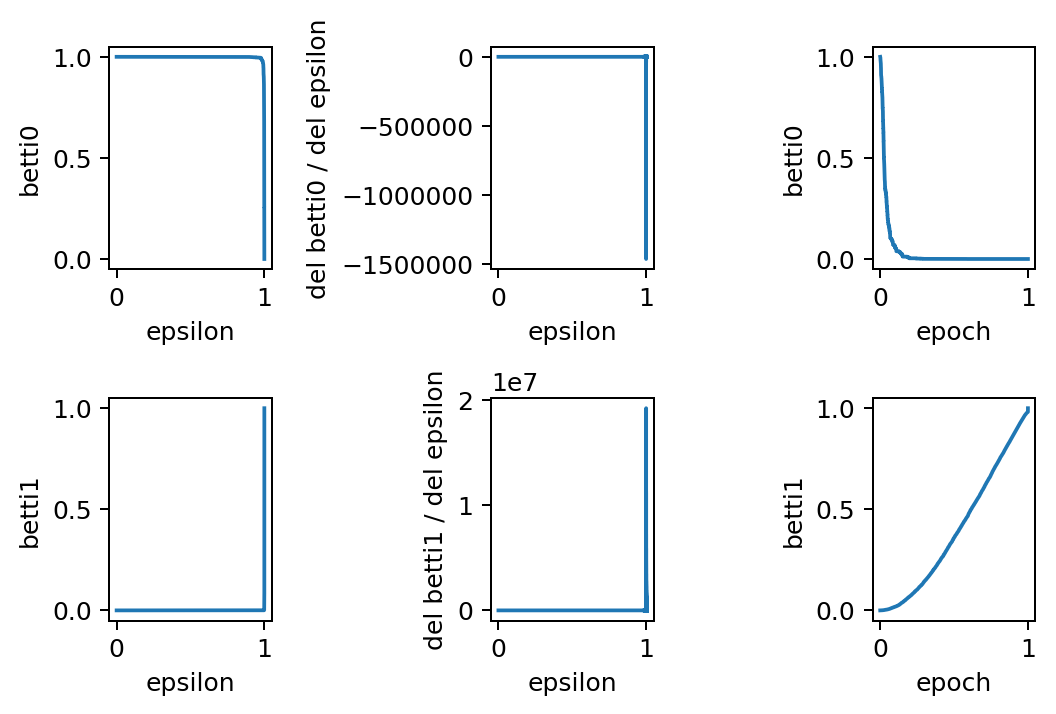

Istanbul


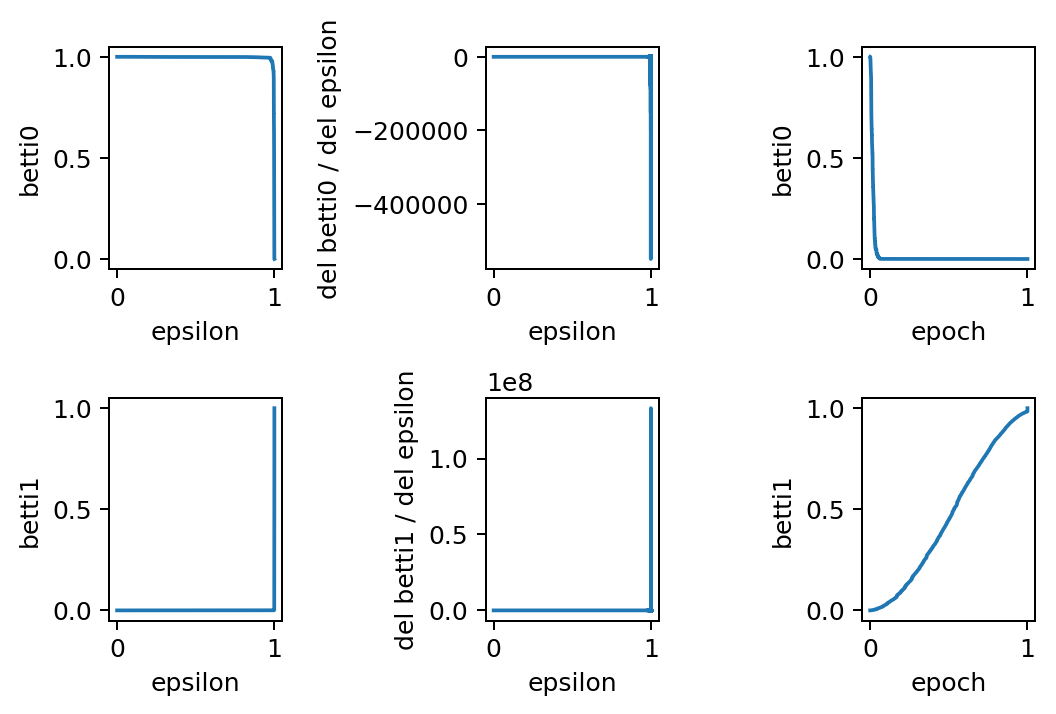

Jakarta


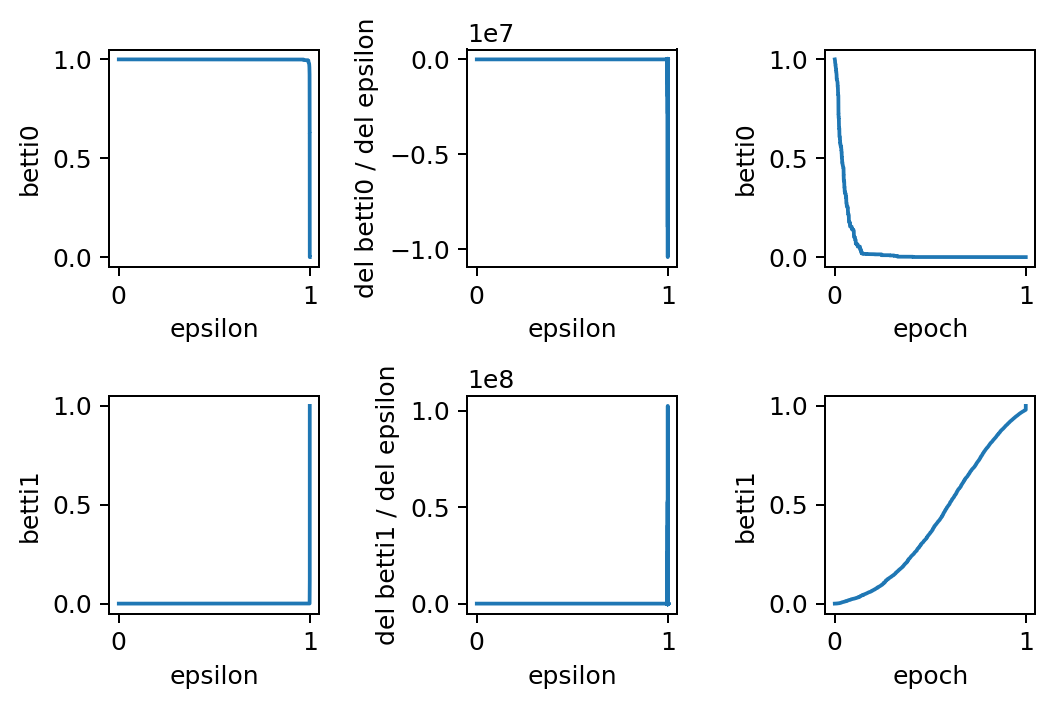

London


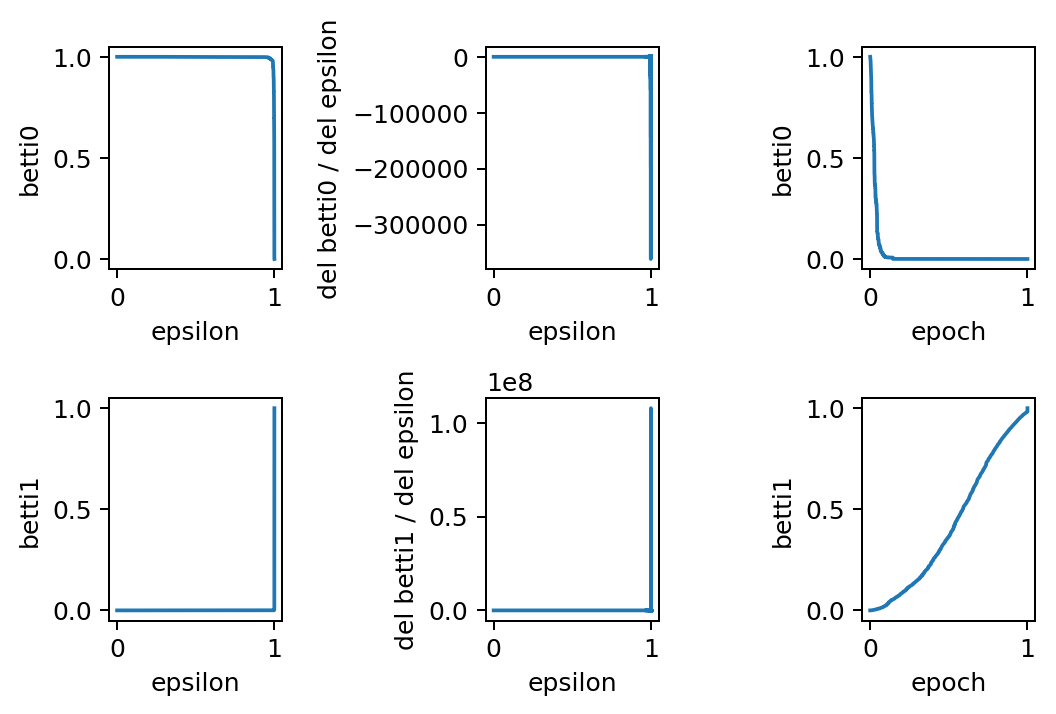

Los Angeles


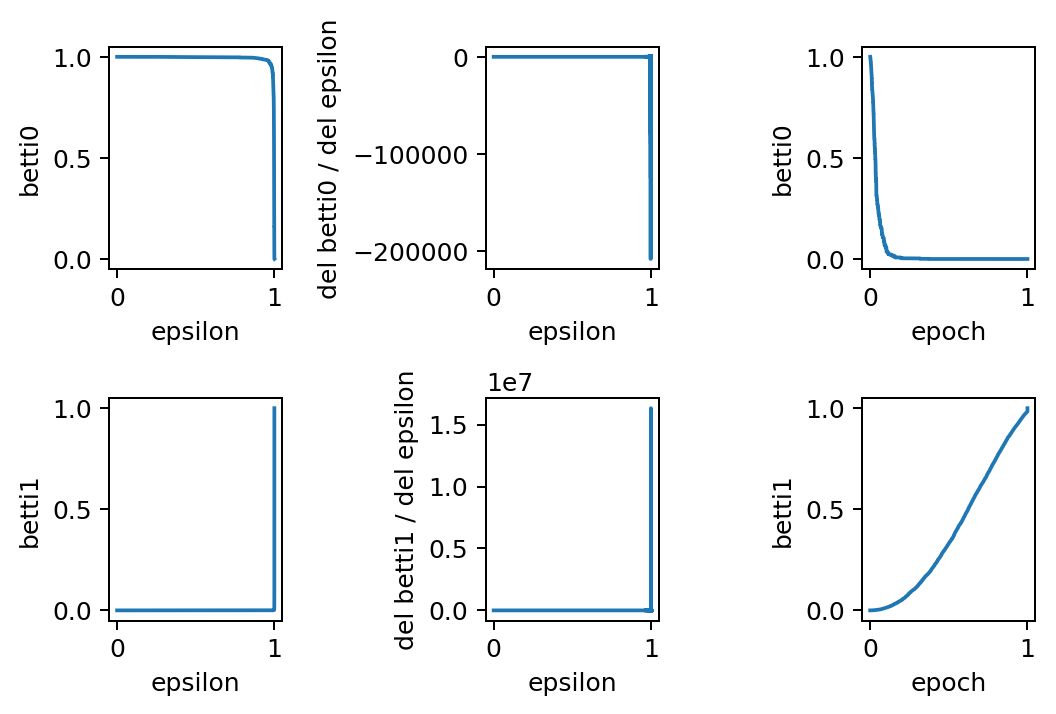

New York


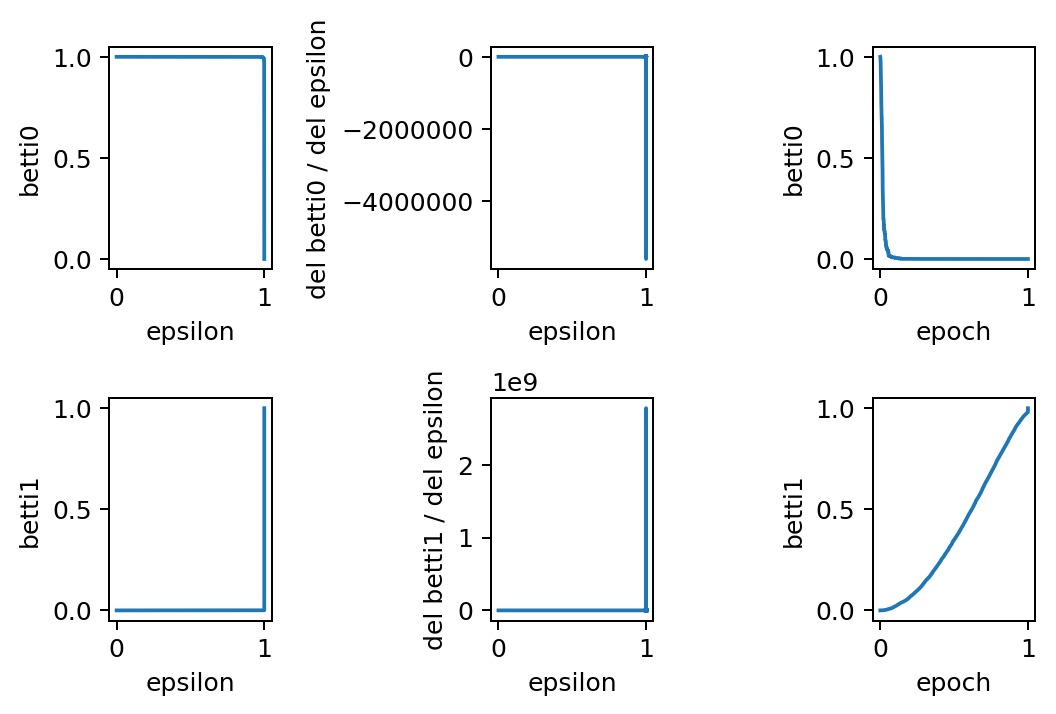

Paris


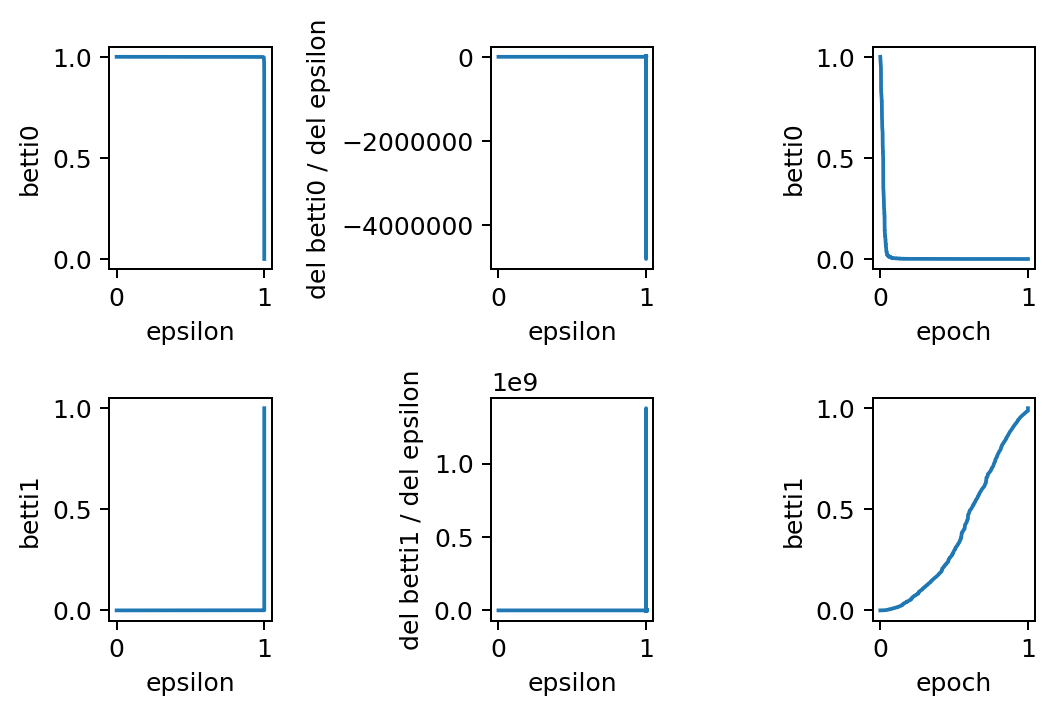

Seoul


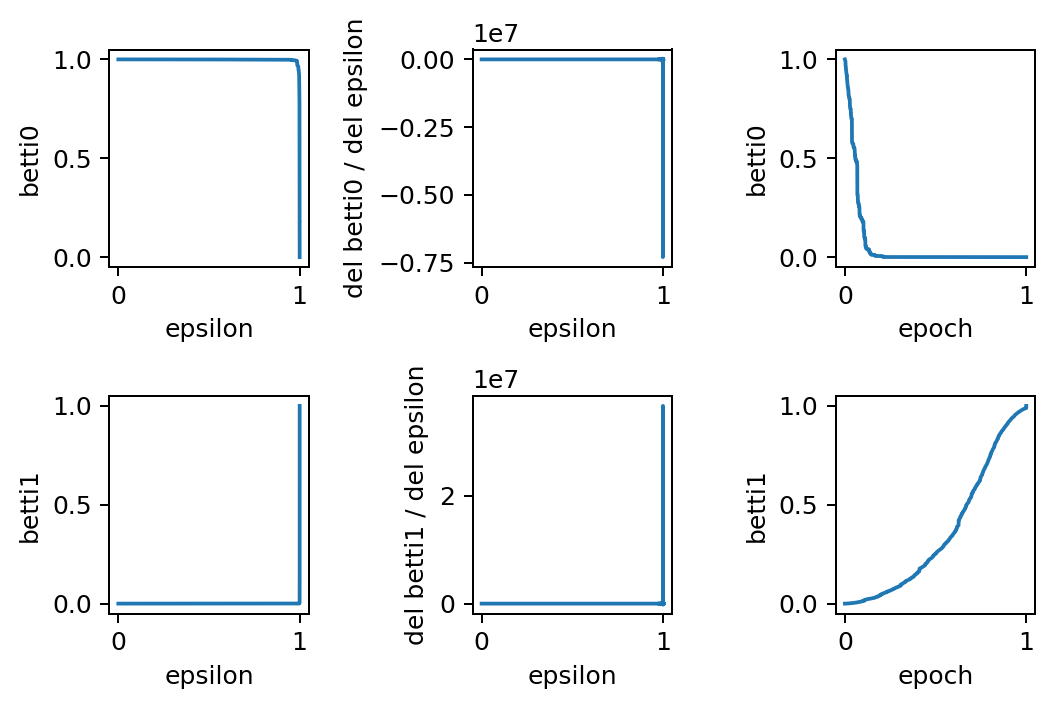

Singapore


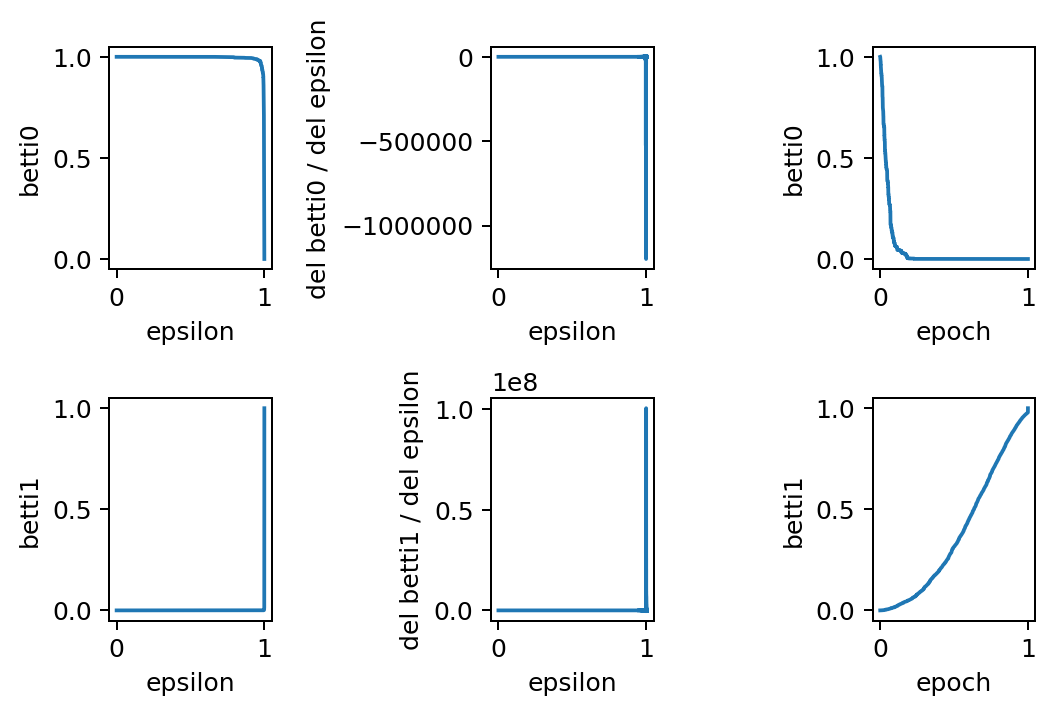

Tokyo


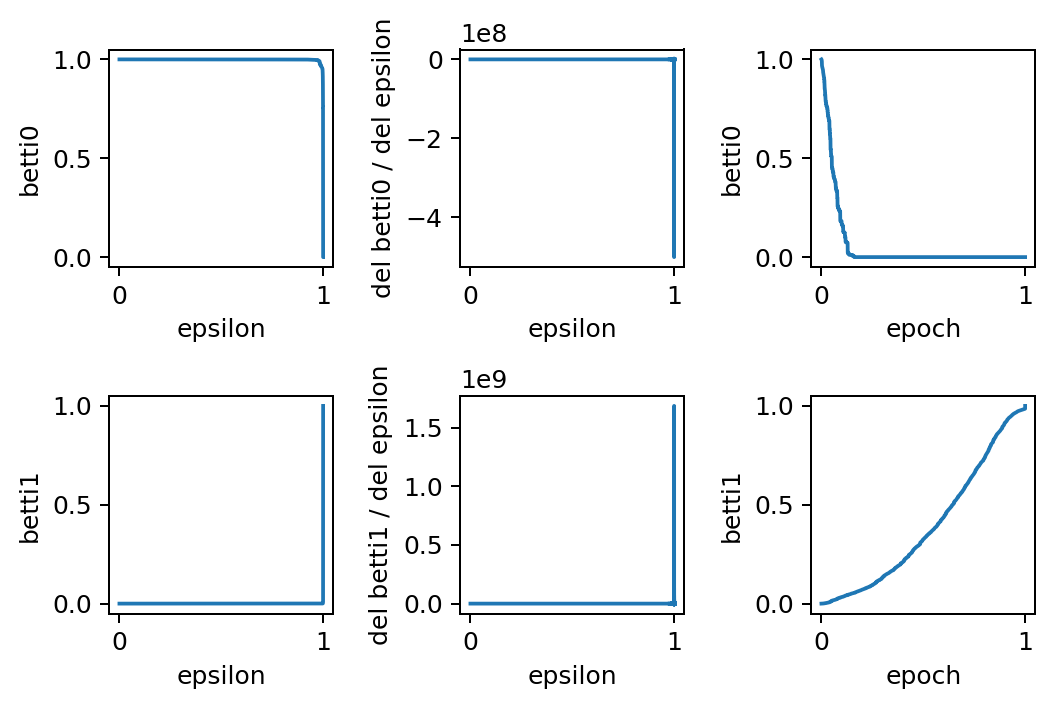

In [11]:
bars = get_all_barcodes()

In [12]:
print(bars)

{'Chicago': (0.036735741932710085, 0.400318121728636), 'Istanbul': (0.016122025224483204, 0.46859807295780675), 'Jakarta': (0.04950896309632126, 0.4163114789624315), 'London': (0.028006532778721734, 0.42678440225024883), 'Los Angeles': (0.04015017931345783, 0.3929292398554276), 'New York': (0.016980638077738294, 0.40132896735947476), 'Paris': (0.019479594726724336, 0.3918082913470152), 'Seoul': (0.05867933715662693, 0.3626096605470859), 'Singapore': (0.04636368159769084, 0.3863113340477853), 'Tokyo': (0.05812912359897082, 0.3936415278710443)}


In [41]:
sas_mean, sas_var = zip(*sas.values())

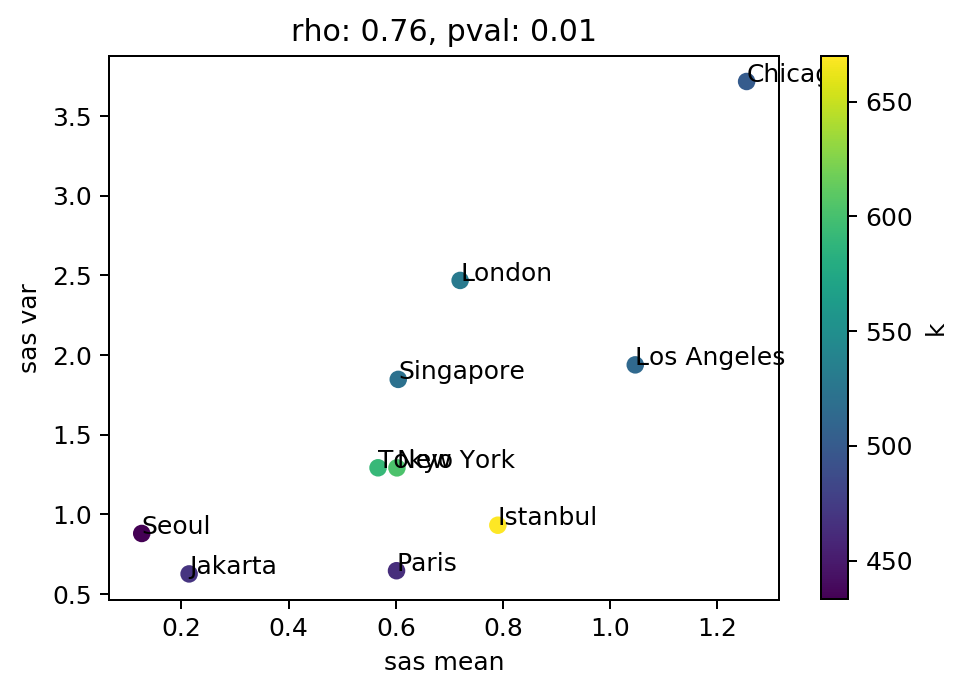

In [52]:
plot_scatter(sas_mean, sas_var, [len(s) for s in sbms.values()], text=sas.keys(), xlab='sas mean', ylab='sas var', zlab='k')

In [13]:
betti_0, betti_1 = zip(*bars.values())
from math import log10
betti_0 = [log10(i) for i in betti_0]
betti_1 = [log10(i) for i in betti_1]

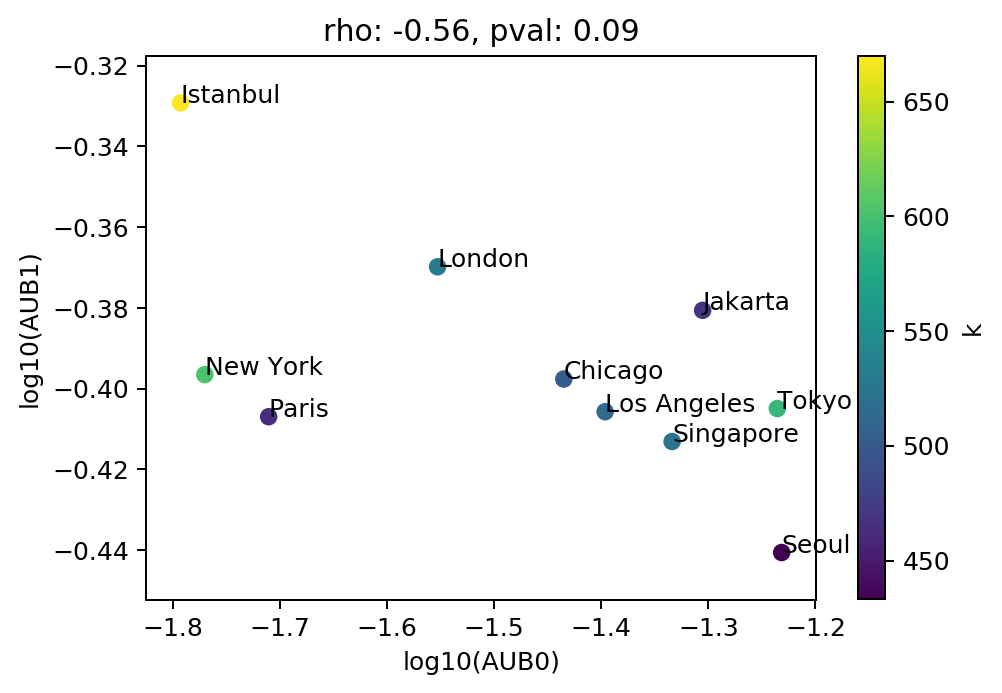

In [20]:
plot_scatter(betti_0, betti_1, [len(s) for s in sbms.values()], text=bars.keys(), xlab='log10(AUB0)', ylab='log10(AUB1)', zlab='k')

In [55]:
lon_v, lon_m = import_data(city='London')

In [58]:
lon_v.head()

,name,lat,lng,category
id,,,,
4ac5e10af964a52087b220e3,Bricklayers Arms,51.517595,-0.133434,Pubs
4bc88f5baf07a5936216812d,Broadway Fish Bar,51.535864,-0.062128,Fish & Chips Shops
4ca38623a73cb60c108d1978,TfL Bus 30,51.543425,-0.103068,Bus Lines
4b97cfb0f964a5201f1735e3,Carphone Warehouse,51.509138,-0.221550,Mobile Phone Shops
4c038768187ec9280ec5b57b,Café Rouge,51.436141,-0.090007,French Restaurants


In [59]:
lon_m.head()

,from,to,date,time,num
0,4acaf933f964a52031c320e3,4ac518b6f964a520f7a020e3,2017-04,OVERNIGHT,1
1,51f803b2498e77b9793083a2,4ac518b6f964a520f7a020e3,2018-12,NIGHT,1
2,4e1ef2cefa76920758b2431d,4ac518b6f964a520f7a020e3,2019-02,MIDDAY,1
3,4acda31ff964a52075cc20e3,4ac518b6f964a520f7a020e3,2018-03,MIDDAY,1
4,58965f45cf11d448aac31156,4ac518b6f964a520f7a020e3,2019-03,OVERNIGHT,1


In [49]:
print(lon_m['time'].value_counts())

MIDDAY       2382295
AFTERNOON    2303189
NIGHT        1770591
MORNING       884506
OVERNIGHT     310413
Name: time, dtype: int64


In [69]:
#lon_psi, lon_pi = generate_params(lon_v, lon_m)

In [124]:
#np.save('4sq_lon_psi', lon_psi)
#lon_pi.to_csv('4sq_lon_pi.csv', header=True)

In [3]:
from pandas import read_csv
import numpy as np
lon_pi = read_csv('4sq_lon_pi.csv', index_col=0)
lon_psi = np.load('4sq_lon_psi.npy')

In [4]:
top_cats_out = [lon_pi.index[i] for i in np.argsort(lon_psi.sum(1))][::-1]
top_cats_in = [lon_pi.index[i] for i in np.argsort(lon_psi.sum(0))][::-1]

In [5]:
top_cats_out[:50]

['Train Stations',
 'Metro Stations',
 'Pubs',
 'Hotels',
 'Parks',
 'Coffee Shops',
 'Supermarkets',
 'Grocery Stores',
 'Cafés',
 'Department Stores',
 'Plazas',
 'Clothing Stores',
 'Gyms or Fitness Centers',
 'Italian Restaurants',
 'Sandwich Places',
 'Offices',
 'Fast Food Restaurants',
 'Bars',
 'Bridges',
 'Burger Joints',
 'Shopping Malls',
 'Markets',
 'Airport Terminals',
 'Monuments / Landmarks',
 'Airports',
 'Bakeries',
 'Restaurants',
 'Pizza Places',
 'Cocktail Bars',
 'French Restaurants',
 'Platforms',
 'Light Rail Stations',
 'Indian Restaurants',
 'Sushi Restaurants',
 'Theaters',
 'Gastropubs',
 'Gardens',
 'Hospitals',
 'Japanese Restaurants',
 'Scenic Lookouts',
 'Intersections',
 'Residential Buildings (Apartments / Condos)',
 'Turkish Restaurants',
 'English Restaurants',
 'Churches',
 'Steakhouses',
 'Breakfast Spots',
 'Chinese Restaurants',
 'Asian Restaurants',
 'Portuguese Restaurants']

In [6]:
top_cats_in[:50]

['Train Stations',
 'Metro Stations',
 'Pubs',
 'Hotels',
 'Parks',
 'Coffee Shops',
 'Supermarkets',
 'Grocery Stores',
 'Cafés',
 'Department Stores',
 'Plazas',
 'Clothing Stores',
 'Gyms or Fitness Centers',
 'Italian Restaurants',
 'Sandwich Places',
 'Offices',
 'Fast Food Restaurants',
 'Bars',
 'Burger Joints',
 'Bridges',
 'Shopping Malls',
 'Airport Terminals',
 'Markets',
 'Monuments / Landmarks',
 'Bakeries',
 'Pizza Places',
 'Restaurants',
 'Cocktail Bars',
 'Airports',
 'French Restaurants',
 'Platforms',
 'Light Rail Stations',
 'Indian Restaurants',
 'Sushi Restaurants',
 'Gastropubs',
 'Theaters',
 'Gardens',
 'Hospitals',
 'Scenic Lookouts',
 'Japanese Restaurants',
 'Intersections',
 'Residential Buildings (Apartments / Condos)',
 'Turkish Restaurants',
 'Airport Gates',
 'English Restaurants',
 'Churches',
 'Steakhouses',
 'Airport Lounges',
 'Chinese Restaurants',
 'Breakfast Spots']

In [1]:
from egosbm import EgocentricSBM

In [2]:
#lon_sbm = EgocentricSBM.StochasticBlockModel(lon_psi, pi=lon_pi.values, name=('london_4sq', lon_pi.index))
#lon_sbm.save()
lon_sbm = EgocentricSBM.StochasticBlockModel(filepath='london_4sq.npz')

In [3]:
print(lon_sbm.mean_affinity(), lon_sbm.mean_homoffinity(), lon_sbm.mean_heteroffinity())

10146880.0 897522.0 9249358.0


In [20]:
print(lon_sbm.sas_global())

(2.6486815325287636, 2.9635687513654543)


C:\Users\sl2416\Documents\phd\dat\egosbm.py:1169: RuntimeWarning: invalid value encountered in subtract
  if log_ratio: out = np.log2(out) - np.hstack([np.log2(np.diag(out))[:,np.newaxis]]*self.get_shape())


In [5]:
lon_sbm.merge()
print(lon_sbm.mean_affinity(), lon_sbm.mean_homoffinity(), lon_sbm.mean_heteroffinity())
print(lon_sbm.sas_global())

10146880.0 897536.0 9249344.0
(2.654421191405735, 3.024262080013652)


In [3]:
%matplotlib inline

C:\Users\sl2416\Documents\phd\dat\egosbm.py:1163: RuntimeWarning: symmetrising the stochastic block matrix
  if self.directed: warn('symmetrising the stochastic block matrix', RuntimeWarning)


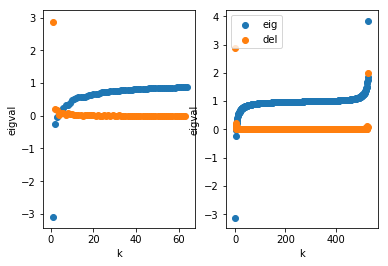

In [4]:
lon_clusts = lon_sbm.cluster(k=64)

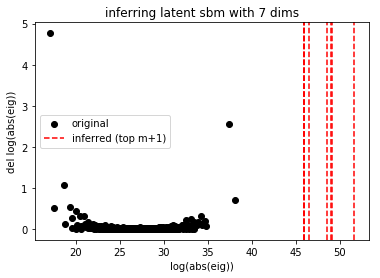

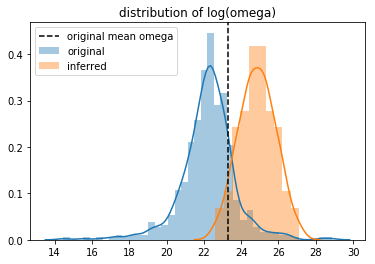

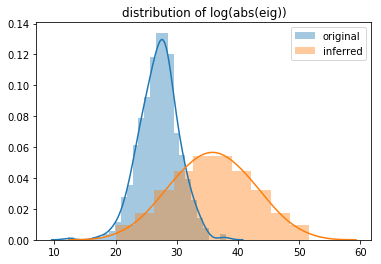

In [6]:
psi, pi, omega = lon_sbm.project(m=7, plot=True)

In [8]:
lon_bar = lon_sbm.generate_barcode()

In [17]:
lon_sbm.dims[380]

'Airports'

In [25]:
tmp_sbm_kron_bar = tmp_sbm_kron.generate_barcode()

In [35]:
tmp_sbm_kron.sas_global()

(0.5574703087512423, 1.5417317142383602)

In [55]:
lon_com.sas_global()

C:\Users\sl2416\Documents\phd\dat\egosbm.py:1168: RuntimeWarning: divide by zero encountered in log2
  if log_ratio: out = np.log2(out) - np.hstack([np.log2(np.diag(out))[:,np.newaxis]]*self.get_shape())
C:\Users\sl2416\Documents\phd\dat\egosbm.py:1341: RuntimeWarning: invalid value encountered in subtract
  var = self.find_mean((value - mean)**2, pi, approx)


(inf, nan)

In [33]:
tmp_sbm_kron_bar.area()

(0.9999151219169511, 8.805730411044457e-06)

In [32]:
lon_bar.area()

(0.9971196450776001, 4.019025905325021e-05)

In [54]:
lon_com = lon_sbm.compress(pi=None, k=16, inplace=False)

C:\Users\sl2416\Documents\phd\dat\egosbm.py:1163: RuntimeWarning: symmetrising the stochastic block matrix
  if self.directed: warn('symmetrising the stochastic block matrix', RuntimeWarning)


In [1196]:
def compress(eigs, m=None, mo=1, norm=False, plot=True):
    eigs = np.array(eigs)
    if norm: eigs_max = np.abs(eigs).max()
    else: eigs_max = 1
    eigs /= eigs_max #normalizing
    if m is None:
        from math import log2, ceil
        m = ceil(log2(len(eigs)))
    if m<2: raise ValueError('number of latent dimensions must be >= 2')
    if m>12: plot=False
    eigs_logabs = np.log2(np.abs(eigs))
    idx = np.argsort(eigs_logabs, kind='mergesort')
    eigs_sorted = eigs[idx]
    eigs_logabs = eigs_logabs[idx]
    a = np.ones((m, m)) - np.eye(m)
    b = eigs_logabs[-(m+1):-1]
    a_inv = np.linalg.inv(a)
    a_inv_b = np.dot(a_inv, b)
    k = (np.dot(np.ones(m), a_inv_b) - eigs_logabs[-1])/np.dot(np.ones(m), np.dot(a_inv, np.ones(m)))
    lambda_pos = np.dot(a_inv, b-k)
    lambda_pos = 2**lambda_pos
    lambda_neg = 2**k*np.ones(m)
    if eigs_sorted[-1]<0: raise RuntimeError('largest eigenvalue must not be negative')
    for i in range(m):
        if eigs_sorted[-(i+2)]<0: lambda_neg[-(i+1)] = -lambda_neg[-(i+1)]
    p = (lambda_pos+lambda_neg)/2
    q = (lambda_pos-lambda_neg)/2
    if plot:
        import matplotlib.pyplot as plt
        psi = [np.array([[i,j],[j,i]]) for (i, j) in zip(p, q)]
        psi_full = psi[0]
        for i in range(1, m): psi_full = np.kron(psi_full, psi[i])
        eigs_psi = np.linalg.eigvalsh(psi_full)
        eigs_psi_logabs = np.log2(np.abs(eigs_psi))
        idx = np.argsort(eigs_psi_logabs, kind='mergesort')
        eigs_psi_sorted = eigs_psi[idx]
        eigs_psi_logabs = eigs_psi_logabs[idx]
        eigs_del = np.diff(eigs_sorted)
        h1 = plt.scatter(eigs_sorted[1:], eigs_del, color='black', label='original')
        for i in eigs_psi_sorted[-(m+1):]: h2 = plt.gca().axvline(i, ls='--', color='red', label='inferred (top m+1)')
        plt.xlabel('eig')
        plt.ylabel('del eig')
        plt.legend(handles=[h1, h2])
        plt.title('inferring latent sbm with %d dims'%m)
        plt.show()
        eigs_del = np.diff(eigs_logabs)
        h1 = plt.scatter(eigs_logabs[1:], eigs_del, color='black', label='original')
        for i in eigs_psi_logabs[-(m+1):]: h2 = plt.gca().axvline(i, ls='--', color='red', label='inferred (top m+1)')
        plt.xlabel('log(abs(eig))')
        plt.ylabel('del log(abs(eig))')
        plt.legend(handles=[h1, h2])
        plt.title('inferring latent sbm with %d dims'%m)
        plt.show()
        try:
            import seaborn as sns
            plt.figure()
            sns.distplot(eigs_logabs, label='original')
            sns.distplot(eigs_psi_logabs, label='inferred')
            plt.legend()
            plt.title('distribution of log(abs(eig))')
            plt.show()
        except: pass
    lambda_pos *= mo*(eigs_max/mo)**(1/m)
    lambda_neg *= mo*(eigs_max/mo)**(1/m)
    return lambda_pos, lambda_neg

In [22]:
def project(sbm, m=None, directed=False, plot=True):
    if m is None:
        from math import log2, ceil
        m = ceil(log2(len(sbm)))
    a = sbm.get_psi(directed=directed)
    eigval, eigvec = np.linalg.eig(a)
    idx = np.argsort(np.abs(eigval), kind='mergesort')
    eigval = eigval[idx][::-1]
    eigvec = eigvec[:, idx][:, ::-1]
    proj = np.dot(a, eigvec)
    proj /= np.linalg.norm(a, 2, 1)[:,np.newaxis]
    com_pos = [[sbm.dims[j] for j in range(proj.shape[0]) if proj[j,i]>=0] for i in range(1, m+1)]
    com_neg = [[sbm.dims[j] for j in range(proj.shape[0]) if proj[j,i]<0] for i in range(1, m+1)]
    psi = []
    pi = []
    rho = []
    om = []
    for i in range(m):
        tmp = sbm.copy()
        tmp.merge(com_pos[i])
        tmp.merge(com_neg[i])
        psi.append(tmp.get_psi(directed=directed))
        pi.append(tmp.get_pi())
        rho.append(tmp.get_rho())
        om.append(tmp.affinity_out())
    print(rho)
    omega_full = sbm.meanomega
    pi_full = 1
    psi_full = sbm.meanomega
    for i in range(m):
        psi_full = np.kron(psi_full, psi[i]/sbm.meanomega)
        pi_full = np.kron(pi_full, np.diag(pi[i]))
        omega_full = np.kron(omega_full, np.diag(om[i]/sbm.meanomega))
    pi_full = np.diag(pi_full)
    omega_full = np.diag(omega_full)
    if plot:
        import seaborn as sns
        sns.distplot(np.log2(sbm.affinity_out()), label='original')
        sns.distplot(np.log2(omega_full), label='inferred')
        plt.gca().axvline(np.log2(sbm.meanomega), ls='--', color='black', label='original mean omega')
        plt.title('distribution of log(omega)')
        plt.legend()
        plt.show()
        eigval_full = np.linalg.eigvals(psi_full)
        eigval_logabs = np.sort(np.log2(np.abs(eigval)), kind='mergesort')
        eigval_full_logabs = np.sort(np.log2(np.abs(eigval_full)), kind='mergesort')
        eigval_del = np.diff(eigval_logabs)
        h1 = plt.scatter(eigval_logabs[1:], eigval_del, color='black', label='original')
        for i in eigval_full_logabs[-(m+1):]: h2 = plt.gca().axvline(i, ls='--', color='red', label='inferred (top m+1)')
        plt.xlabel('log(abs(eig))')
        plt.ylabel('del log(abs(eig))')
        plt.legend(handles=[h1, h2])
        plt.title('inferring latent sbm with %d dims'%m)
        plt.show()        
        sns.distplot(eigval_logabs, label='original')
        sns.distplot(eigval_full_logabs, label='inferred')
        plt.legend()
        plt.title('distribution of log(abs(eig))')
        plt.show()
    return psi_full, pi_full, omega_full

[array([0.96270374, 0.33689718]), array([0.98422417, 0.49157487]), array([0.98351511, 0.46657288]), array([0.97409638, 0.08507952]), array([0.84089605, 0.23642515])]


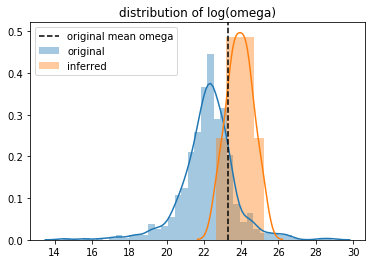

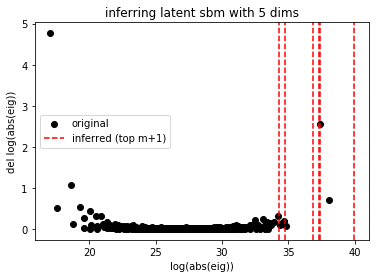

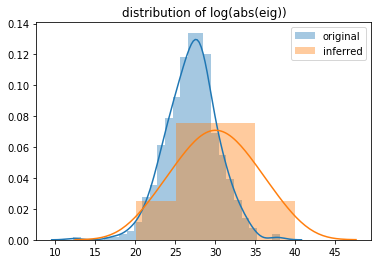

In [23]:
import numpy as np
import matplotlib.pyplot as plt
lon_sbm_kron = project(lon_sbm, m=5)

In [24]:
tmp_sbm_kron = EgocentricSBM.StochasticBlockModel(lon_sbm_kron[0], lon_sbm_kron[1])

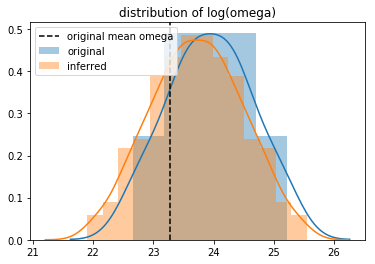

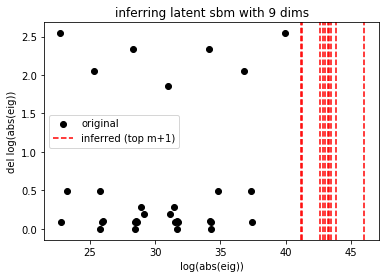

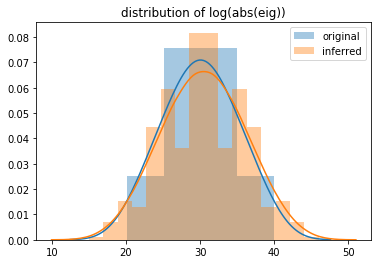

In [29]:
tmp_sbm_kron_new = project(tmp_sbm_kron, m=9)

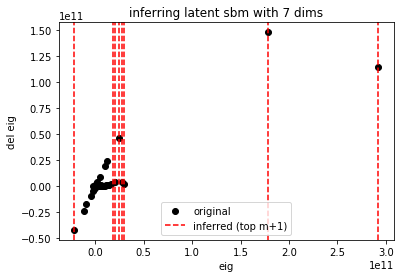

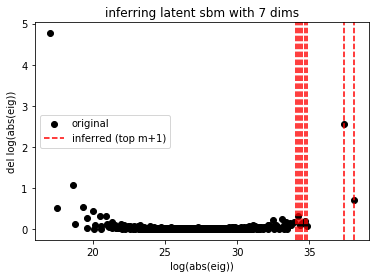

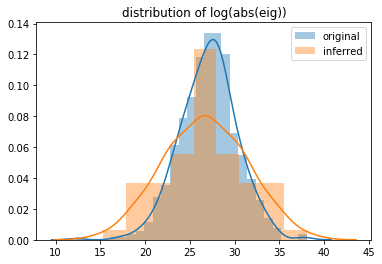

In [1197]:
import numpy as np
eigs = np.linalg.eigvalsh(lon_sbm.get_psi(directed=False))
mo = lon_sbm.meanomega
p, q = compress(eigs, mo=mo, m=7)

In [1198]:
print([(p, q) for (p, q) in zip(p, q)])

[(84054346.20603755, 4614447.020886974), (67146858.66485155, 4614447.020886974), (61882238.18875121, -4614447.020886974), (55688862.586833484, 4614447.020886974), (48011717.70745698, 4614447.020886974), (45057497.24110809, 4614447.020886974), (7581332.6237056125, 4614447.020886974)]


In [1143]:
def solve_w(p, q, pi, w=1.):
    from math import sqrt
    a = pi
    b = w+p*(2*pi-1)
    c = pi*((p**2-q**2)*(1-pi)**2-w*p)
    d = b**2 - 4*a*c
    return (b + sqrt(d))/(2*a)

In [1193]:
def solve_rho(lambda1, lambda2, pi, w=1.):
    prod_e = (lambda1*lambda2)/w**2
    sum_e = (lambda1+lambda2)/w
    pi1 = pi
    pi2 = 1-pi
    rho1 = pi1*(1 + (prod_e*pi1-sum_e)*pi2)/(pi1-pi2)
    rho2 = pi2*(1 + (prod_e*pi2-sum_e)*pi1)/(pi2-pi1)
    return pi1, rho1, pi2, rho2

In [1296]:
def get_constraints(lambda1, lambda2, w=1.):
    from sympy import symbols, Number, solveset, S
    pi1 = symbols('pi')
    pi2 = 1-pi1 # pi constraint
    w = symbols('mom')
    w1 = symbols('omega')
    w2 = (w-pi1*w1)/pi2 # omega constraint
    lambda_sum = lambda1+lambda2
    lambda_prod = lambda1*lambda2
    rho1 = (1 + lambda_prod*pi1*pi2/(w1*w2) - lambda_sum*pi2/w2)/(1-w1*pi2/(w2*pi1)) # lambda constraint
    rho2 = (1 + lambda_prod*pi1*pi2/(w1*w2) - lambda_sum*pi1/w1)/(1-w2*pi1/(w1*pi2))
    constraints = [(pi1, Number(0), '>='), (pi1, Number(1), '<=')]
    constraints += [(w1, Number(0), '>='), (w1*pi1, Number(w), '<=')]
    constraints += [(rho1, Number(0), '>='), (rho1, Number(1), '<=')]
    constraints += [(rho2, Number(0), '>='), (rho2, Number(1), '<=')]
    solutions = []
    solutions.append(solveset(pi1>=0, pi1, domain=S.Reals))
    solutions.append(solveset(pi1<=1, pi1, domain=S.Reals))
    solutions.append(solveset(w1*pi1<=w, pi1, domain=S.Reals))
    solutions.append(solveset(lambda_sum - lambda_prod*pi1/w1 >= w1/pi1 , pi1, domain=S.Reals))
    solutions.append(solveset(lambda_sum - lambda_prod*pi1/w1 >= w2/pi2 , pi1, domain=S.Reals))
    solutions.append(solveset(lambda_sum - lambda_prod*pi2/w2 >= w1/pi1 , pi1, domain=S.Reals))
    solutions.append(solveset(lambda_sum - lambda_prod*pi2/w2 >= w2/pi2 , pi1, domain=S.Reals))
    intervals = solutions[0]
    for i in range(1, len(solutions)): intervals = intervals.intersect(solutions[i])
    return intervals

In [ ]:
def pi_given_omega(lambda1, lambda2, w, mo=1.):
    from math import sqrt
    assert(w>=0)
    assert(mo>0)
    a = w/mo
    if a<=1:
        pi_1 = (0, 1)
        pi_2 = (,)
    else:
        tmp = (1+1/a)/2
        tmp = tmp - sqrt(tmp**2-1)
        pi_1 = (0, tmp)
        pi_2 = (tmp, 1)
    lambda_sum = lambda1+lambda2
    lambda_prod = lambda1*lambda2
    tmp = lambda_sum**2-4*lambda_prod
    if lambda_prod>0:
        if tmp>=0:
            x = (max(0, (lambda_sum-sqrt(tmp))/(2*lambda_prod)), (lambda_sum+sqrt(tmp))/(2*lambda_prod))
            y = None
        else:
            x = (,)
            y = (,)
    else:
        x = (max(0, (lambda_sum-sqrt(tmp))/(2*lambda_prod)), float('inf'))
        y = None
    if pi_1:
        if x:
            
        else: pi_1 = (,)
       

In [1297]:
[get_constraints(p[i], q[i], w=mo) for i in range(len(p))]

KeyboardInterrupt: 

In [1200]:
params = [solve_rho(p_i, q_i, 0.2, w=mo) for (p_i, q_i) in zip(p, q)]
print(params)

[(0.2, 1.7960252186966108, 0.8, -0.1932786139989287), (0.2, 1.392099402479534, 0.8, 0.08940503962446418), (0.2, 1.3196192396878896, 0.8, -0.7633715338040488), (0.2, 1.11836385148466, 0.8, 0.28097627021958316), (0.2, 0.9349541636723823, 0.8, 0.40933380167490674), (0.2, 0.8643767990433462, 0.8, 0.45872670130012944), (0.2, -0.03094193739784501, 0.8, 1.0853070321761813)]


In [1187]:
def solve_k(p, q, pi, w=1.):
    from math import sqrt
    b = (p*(pi**2+(1-pi)**2)-w)/(q*pi*(1-pi))
    try: return (-b + sqrt(b**2-4))/2, (-b - sqrt(b**2-4))/2
    except: return

In [1180]:
def solve_params(p, q, pi): 
    rho1, rho2 = p*(1+pi)/(p*(1+pi)+q*(1-pi)), p*(1-pi)/(p*(1-pi)+q*(1+pi))
    w1, w2 = p*rho1/pi, p*rho2/(1-pi)
    return pi, 1-pi, rho1, rho2, w1, w2, w1*rho1/pi, w1*(1-rho1)*(1+1/pi)/(1-pi)

In [1160]:
def solve_params(p, q, pi, w=1.):
    from math import sqrt
    a = pi
    b = w+p*(2*pi-1)
    c = pi*((p**2-q**2)*(1-pi)**2-w*p)
    d = b**2 - 4*a*c
    w1 = (b + sqrt(d))/(2*a)
    w2 = (w-w1*pi)/(1-pi)
    rho1 = p*pi/w1
    rho2 = p*(1-pi)/w2
    return pi, 1-pi, rho1, rho2, w1, w2

In [1157]:
params = [solve_rho(p_i, q_i, 0.8) for (p_i, q_i) in zip(p, q)]
print(params)

[(0.9068112667374092, 0.10725022889672337), (0.8924160863384395, 0.09289504929586029), (0.9071149327240398, 0.10759528794870409), (0.9078640276848309, 0.10845505704174736), (0.9084256809123709, 0.10910780979353425), (0.9094659742229962, 0.11033563516572553), (0.9117252827965301, 0.11308953625686001), (0.8857262287432554, 0.08733334781741503), (0.9139877835305392, 0.11597391372950677), (0.9160647552510354, 0.11874091749801749), (0.9170382885613305, 0.1200793326901661), (0.9736812340088076, 0.31353432069096615)]


In [1192]:
params = [solve_k(p_i, q_i, 0.5, 1) for (p_i, q_i) in zip(p, q)]
print(params)

[(-0.6700919387094423, -1.4923325326461039), None, (-0.6638451797764593, -1.5063753273568037), (-0.6491166435924451, -1.5405551681214644), (-0.6386418636067517, -1.5658228139828885), (-0.6203465042168685, -1.612002313549602), (-0.5846000706194013, -1.710571124188319), None, (-0.5529685423297499, -1.8084211369182612), (-0.5266973516836119, -1.8986235582986222), (-0.5151294445583637, -1.9412596398121456), (-0.12349080075662666, -8.09776917691854)]


In [1181]:
params = [solve_params(p_i, q_i, 0.2) for (p_i, q_i) in zip(p, q)]
print([(a[-2], a[-1], p_i, q_i) for (a, p_i, q_i) in zip(params, p, q)])

[(219446908.5420541, 202963749.54737666, 22939830.59857655, 21216767.477845266), (170680041.67767346, 185184740.9950738, 20275669.20376454, 21998732.324495826), (210728307.22922984, 194199886.46468198, 21968110.556553252, 20245047.43582196), (192109350.58971435, 175468606.9818309, 19891931.81198691, 18168868.691255618), (180329113.73931444, 163603523.4846213, 18577427.80654234, 16854364.685811054), (162218817.87242466, 145334633.17516655, 16554738.506857883, 14831675.386126596), (134016029.33400977, 116780839.38304704, 13398058.181504201, 11674995.060772913), (84926787.57082477, 98613020.40459901, 10692074.101234943, 12415137.221966231), (114975230.817942, 97379277.4689504, 11258814.801945183, 9535751.681213897), (102274411.13772036, 84338851.73590717, 9825468.059172986, 8102404.9384417), (97405230.30636148, 79307638.94028793, 9273905.942083517, 7550842.8213522285), (42145728.29027781, 10252854.522521786, 2276989.8580528093, 553926.7373215227)]


In [948]:
params_re = [((p[4]*p[2]/p[0], p[4]*(1-p[2])/(1-p[0])), (p[5]*p[3]/p[1], p[5]*(1-p[3])/(1-p[1]))) for p in params]
print(params_re)

[((44334396.613462254, 44541090.39803774), (44334396.613462254, 44541090.39803774)), ((35880652.84286925, 36124870.636230886), (35880652.842869245, 36124870.63623087)), ((28633895.583932113, 28840636.16387474), (28633895.583932117, 28840636.163874745)), ((30151654.80386023, 30428258.811625678), (30151654.803860236, 30428258.81162568)), ((26313082.364171986, 26614530.9380246), (26313082.364171986, 26614530.938024603)), ((24835972.13099754, 25147365.424922768), (24835972.130997535, 25147365.424922764)), ((6097889.822296294, 1332416.5157817523), (6097889.822296294, 1332416.5157817514))]


In [909]:
params_re = [p[4]*p[0] + p[5]*p[1] for p in params]
print(params_re)

[10146880.0000000, 10146880.0000000, 10146880.0000000, 10146880.0000000, 10146880.0000000, 10146880.0000000, 10146880.0000000, 10146880.0000000, 10146880.0000000]


In [904]:
print([(a[0]+a[1], a[0]-a[1]) for a in params_re])

[(35971896.2907194, -22773195.5262213), (33981328.9802141, -20513599.5598714), (30970307.7358861, -16984694.1501919), (26473057.0074428, -11275504.4722004), (26995316.5785689, -13146333.8685680), (23677956.3031750, -7153826.21314943), (22011400.3841575, -4185966.66907421), (21435140.4495128, -2978870.26151810), (19815622.4774450, 18024620.6491658)]


In [259]:
m = 4
a = np.ones((m, m)) - np.eye(m)
a = np.vstack([np.ones(m), a])
ata = np.dot(a.transpose(), a)
print(np.linalg.matrix_rank(ata))
a_inv = np.linalg.inv(ata)

4


In [262]:
a_inv

array([[ 0.76923077, -0.23076923, -0.23076923, -0.23076923],
       [-0.23076923,  0.76923077, -0.23076923, -0.23076923],
       [-0.23076923, -0.23076923,  0.76923077, -0.23076923],
       [-0.23076923, -0.23076923, -0.23076923,  0.76923077]])

In [204]:
from itertools import product
m = 4
a = np.hstack([np.array(list(product(*[[1, 0]]*m))), np.array(list(product(*[[0, 1]]*m)))])
print(np.linalg.matrix_rank(a))
#ata_inv = np.linalg.inv(np.matmul(a, a.transpose()))
print(a)
#print(ata_inv)

5
[[1 1 1 1 0 0 0 0]
 [1 1 1 0 0 0 0 1]
 [1 1 0 1 0 0 1 0]
 [1 1 0 0 0 0 1 1]
 [1 0 1 1 0 1 0 0]
 [1 0 1 0 0 1 0 1]
 [1 0 0 1 0 1 1 0]
 [1 0 0 0 0 1 1 1]
 [0 1 1 1 1 0 0 0]
 [0 1 1 0 1 0 0 1]
 [0 1 0 1 1 0 1 0]
 [0 1 0 0 1 0 1 1]
 [0 0 1 1 1 1 0 0]
 [0 0 1 0 1 1 0 1]
 [0 0 0 1 1 1 1 0]
 [0 0 0 0 1 1 1 1]]


In [165]:
np.allclose(np.eye(m), np.dot(a_inv, a))

True

In [185]:
2**np.dot(a_inv, eigs[-(m+1):-1][::-1])

array([ 0.945459  ,  5.61906703,  5.98748436,  6.94489199,  7.71726051,
        8.37380509, 10.4823178 , 11.83337831, 12.71140463, 14.09819354])

In [183]:
psi = [2*np.eye(2) + ((i-0.5)/2)*np.ones((2,2)) for i in 2**np.dot(a_inv, eigs[-m:][::-1])]

In [184]:
print(psi)

[array([[2.16052201, 0.16052201],
       [0.16052201, 2.16052201]]), array([[2.42446953, 0.42446953],
       [0.42446953, 2.42446953]]), array([[5.75851807, 3.75851807],
       [3.75851807, 5.75851807]]), array([[6.02133884, 4.02133884],
       [4.02133884, 6.02133884]]), array([[6.70433226, 4.70433226],
       [4.70433226, 6.70433226]]), array([[7.25532287, 5.25532287],
       [5.25532287, 7.25532287]]), array([[7.72368724, 5.72368724],
       [5.72368724, 7.72368724]]), array([[9.22785355, 7.22785355],
       [7.22785355, 9.22785355]]), array([[10.19167021,  8.19167021],
       [ 8.19167021, 10.19167021]]), array([[10.81803476,  8.81803476],
       [ 8.81803476, 10.81803476]])]


In [143]:
a = [np.hstack([np.array([1]*(m-i) + [0]*(m-i))]*(i+1)) for i in range(m)]

In [149]:
a = np.kron(np.eye(m), np.ones((2,2)))

In [150]:
print(a)

[[1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1.]]


In [135]:
a = np.vstack([[0]*i + [1]*m + [0]*(m-i) for i in range(m+1)])
b = np.vstack([1]*(i+1) + [0] + [1]*(m-1-(i+1)) + [0]*(i+1) + [1] + [0]*(m-1-(i+1)) for i in range(m-1))
c = np.vstack([a, b])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


In [137]:
print(a)
print(np.linalg.matrix_rank(a))
#print(np.allclose(np.eye(2*m), np.dot(a, a_inv)))

[[1 1 1 1 0 0 0 0]
 [0 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 0]
 [0 0 0 0 1 1 1 1]]
5


In [136]:
print(b)
print(np.linalg.matrix_rank(b))

[[1 0 1 1 0 1 0 0]
 [1 1 0 1 0 0 1 0]
 [1 1 1 0 0 0 0 1]]
3


In [138]:
print(c)
print(np.linalg.matrix_rank(c))

[[1 1 1 1 0 0 0 0]
 [0 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 0]
 [0 0 0 0 1 1 1 1]
 [1 0 1 1 0 1 0 0]
 [1 1 0 1 0 0 1 0]
 [1 1 1 0 0 0 0 1]]
5


In [91]:
np.dot(a_inv, eigs)

array([-1.50275340e+16,  2.29212781e+16,  2.69359973e+16, -3.59768312e+16,
       -1.44184554e+16,  2.43623617e+16, -1.96713070e+15,  1.98554925e+15,
       -8.77382533e+15, -4.14097599e+13, -1.50275340e+16,  2.29212781e+16,
        2.69359973e+16, -3.59768312e+16, -1.44184554e+16,  2.43623617e+16,
       -1.96713070e+15,  1.98554925e+15, -8.77382533e+15, -4.14097599e+13])

In [ ]:
m = 10
np.ones((m,m))

In [22]:
print(lon_sbm.mean_affinity(), lon_sbm.mean_homoffinity(), lon_sbm.mean_heteroffinity())
print(lon_com.mean_affinity(), lon_com.mean_homoffinity(), lon_com.mean_heteroffinity())
print(lon_sbm.sas_global(), lon_com.sas_global())

10146880.0 897522.0 9249358.0
10146880.000000006 1732698.9999999995 8414181.000000007
(2.6486815325287636, 2.9635687513654543) (2.2897691967896288, 2.7159970987784643)


C:\Users\sl2416\Documents\phd\dat\egosbm.py:1169: RuntimeWarning: divide by zero encountered in log2
  if log_ratio: out = np.log2(out) - np.hstack([np.log2(np.diag(out))[:,np.newaxis]]*self.get_shape())
C:\Users\sl2416\Documents\phd\dat\egosbm.py:1169: RuntimeWarning: invalid value encountered in subtract
  if log_ratio: out = np.log2(out) - np.hstack([np.log2(np.diag(out))[:,np.newaxis]]*self.get_shape())
